# The Great Debate
## Michael Jordan vs. LeBron James 
### Let's take a look at their stats!!!!



First we will load NBA data, parsed from Basketball-Reference.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

player_data = pd.read_csv('player_data (1).csv')
players = pd.read_csv('Players.csv')
stats = pd.read_csv('Seasons_Stats.csv')


Okay, now let's look into dataframe to see what data we have.   

In [3]:
print(player_data.head())

print(players.head())

print(stats.head())

                  name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University  
   Unnamed: 0           Player  height  weight  \
0           0  Curly Armstrong   180.0    77.0   
1           1     Cliff Barker   188.0    83.0   
2           2    Leo Barnhorst   193.0    86.0   
3

From the looks of it, we can use dataframes 'players' and 'stats' for our project today.. Let's merge them!!

In [4]:
nba_df = pd.merge(players, stats, how='inner', on='Player')

nba_df = nba_df.set_index('Player')

nba_df = nba_df.drop(['Unnamed: 0_x','birth_city', 'Unnamed: 0_y', 'blanl', 'blank2'] , axis=1)

nba_df.head()


,height,weight,collage,born,birth_state,Year,Pos,Age,Tm,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,1950.0,G-F,31.0,FTW,63.0,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,1951.0,G-F,32.0,FTW,38.0,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Indiana,1950.0,SG,29.0,INO,49.0,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Indiana,1951.0,SG,30.0,INO,56.0,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Indiana,1952.0,SG,31.0,INO,44.0,...,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0


Okay, now let's create a new dataframe named mj_vs_lbj

In [5]:
mj_vs_lbj = nba_df.loc[['Michael Jordan*','LeBron James']]   
mj_vs_lbj.columns

Index(['height', 'weight', 'collage', 'born', 'birth_state', 'Year', 'Pos',
       'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

I'm interested to see how MJ's PER (Player Efficiency Rating) compares to LBJ. PER is a great way to compare players because it uses the majority of a players stats in its computation. You can read more on PER [here](https://en.wikipedia.org/wiki/Player_efficiency_rating). Let's check out MJ vs. LBJ in regards to PER.  

         PER
Year        
1985.0  25.8
1986.0  27.5
1987.0  29.8
1988.0  31.7
1989.0  31.1
1990.0  31.2
1991.0  31.6
1992.0  27.7
1993.0  29.7
1995.0  22.1
1996.0  29.4
1997.0  27.8
1998.0  25.2
2002.0  20.7
2003.0  19.3
         PER
Year        
2004.0  18.3
2005.0  25.7
2006.0  28.1
2007.0  24.5
2008.0  29.1
2009.0  31.7
2010.0  31.1
2011.0  27.3
2012.0  30.7
2013.0  31.6
2014.0  29.3
2015.0  25.9
2016.0  27.5
2017.0  27.0


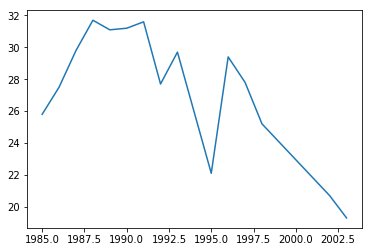

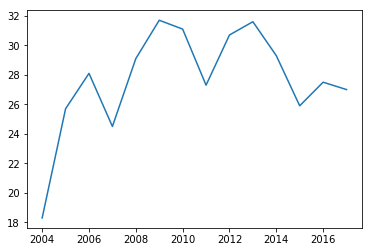

In [6]:
##MJ's PER
mj_PER = mj_vs_lbj.loc['Michael Jordan*'][['Year','PER']]
mj_PER = mj_PER.set_index('Year')

#LBJ's PER
lbj_PER = mj_vs_lbj.loc['LeBron James'][['Year','PER']]
lbj_PER = lbj_PER.set_index('Year')
print(mj_PER)
print(lbj_PER)

#Plot PER's seperately 
plt.plot(mj_PER['PER'])
plt.show()
plt.plot(lbj_PER["PER"])
plt.show()

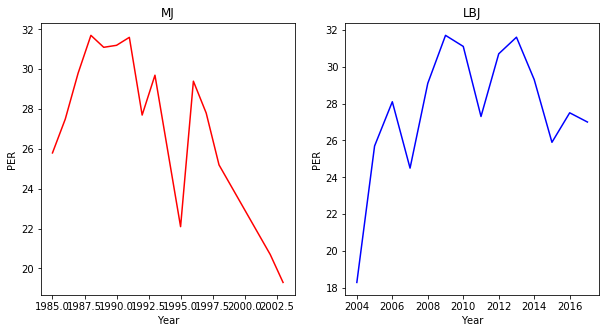

In [7]:
#plot side by side comparison using plt.sublot()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(mj_PER['PER'], color='Red')
plt.ylabel('PER')
plt.xlabel('Year')
plt.title('MJ')

plt.subplot(1,2,2)
plt.plot(lbj_PER['PER'], color='Blue')
plt.ylabel('PER')
plt.xlabel('Year')
plt.title('LBJ')
plt.show()

          TS%
Year         
1985.0  0.592
1986.0  0.533
1987.0  0.562
1988.0  0.603
1989.0  0.614
1990.0  0.606
1991.0  0.605
1992.0  0.579
1993.0  0.564
1995.0  0.493
1996.0  0.582
1997.0  0.567
1998.0  0.533
2002.0  0.468
2003.0  0.491
          TS%
Year         
2004.0  0.488
2005.0  0.554
2006.0  0.568
2007.0  0.552
2008.0  0.568
2009.0  0.591
2010.0  0.604
2011.0  0.594
2012.0  0.605
2013.0  0.640
2014.0  0.649
2015.0  0.577
2016.0  0.588
2017.0  0.619


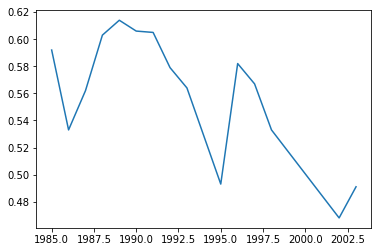

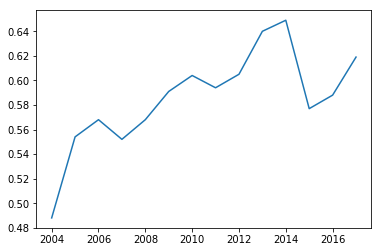

In [8]:
mj_TS = mj_vs_lbj.loc['Michael Jordan*'][['Year','TS%']]
mj_TS = mj_TS.set_index('Year')
lbj_TS = mj_vs_lbj.loc['LeBron James'][['Year','TS%']]
lbj_TS = lbj_TS.set_index('Year')
print(mj_TS)
print(lbj_TS)
plt.plot(mj_TS['TS%'])
plt.show()
plt.plot(lbj_TS["TS%"])
plt.show()

From looking at the line graph above, LBJ may have the upperhand. Before we jump to conclusions, lets take a look at a side by side comparison using a bar graph. 

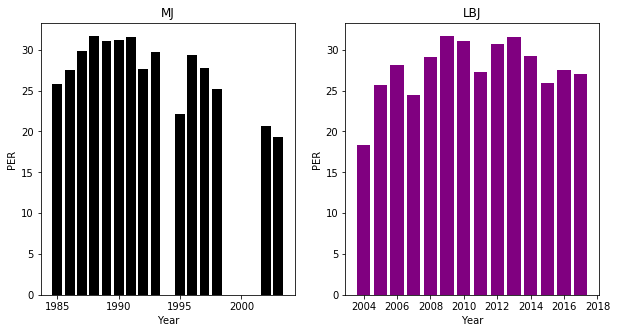

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(mj_PER.index, mj_PER['PER'], color='Black')
plt.ylabel('PER')
plt.xlabel('Year')
plt.title("MJ")

plt.subplot(1,2,2)
plt.bar(lbj_PER.index, lbj_PER['PER'], color='Purple')
plt.ylabel('PER')
plt.xlabel('Year')
plt.title("LBJ")
plt.show()


Using the bar graph, we get a better picture. Overall, it looks like LBJ has a higher average PER than Michael, which we can prove below. Let's check it out: 

In [10]:
#MJ's vs. average PER 
avg_mj= mj_PER['PER'].mean()
avg_lbj= lbj_PER['PER'].mean()

"Mj's average PER is {}, while LBJ's average PER is {}".format(avg_mj, avg_lbj)                                                            

"Mj's average PER is 27.37333333333333, while LBJ's average PER is 27.7"

Wow, that is close. But as you can see, LBJ's average PER is higher than MJ's. Now, let's take a look at who has the better shot. To do this, I will compare there True Shooting percentage stat (TS%). 

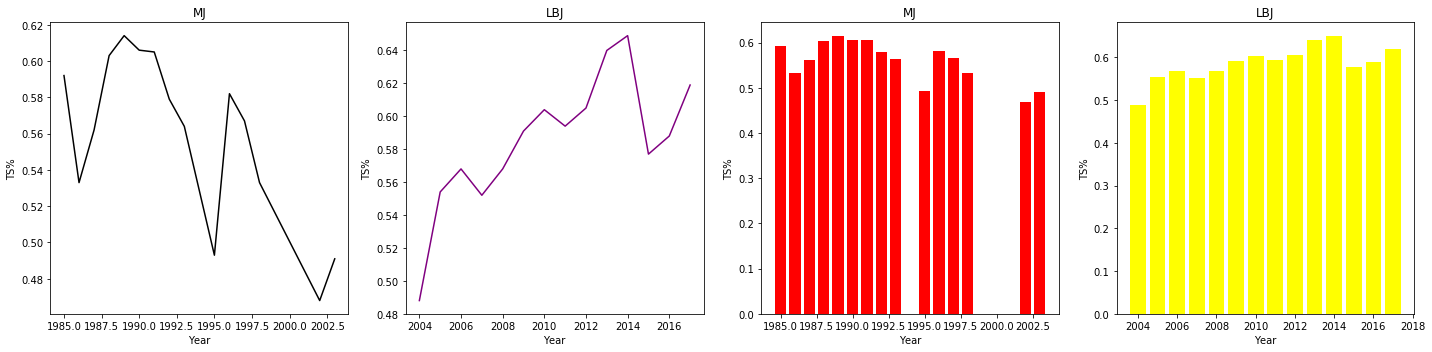

In [11]:
#MJ's TS%
mj_TS = mj_vs_lbj.loc['Michael Jordan*'][['Year','TS%']]
mj_TS = mj_TS.set_index('Year')

#LBJ's TS%
lbj_TS = mj_vs_lbj.loc['LeBron James'][['Year','TS%']]
lbj_TS = lbj_TS.set_index('Year')

#Side by side comparison 

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.plot(mj_TS['TS%'],'Black')
plt.ylabel('TS%')
plt.xlabel('Year')
plt.title('MJ')

plt.subplot(1,4,2)
plt.plot(lbj_TS["TS%"],'Purple')
plt.ylabel('TS%')
plt.xlabel('Year')
plt.title('LBJ')

plt.subplot(1,4,3)
plt.bar(mj_TS.index, mj_TS['TS%'],color='Red')
plt.ylabel('TS%')
plt.xlabel('Year')
plt.title('MJ')

plt.subplot(1,4,4)
plt.bar(lbj_TS.index, lbj_TS["TS%"],color='Yellow')
plt.ylabel('TS%')
plt.xlabel('Year')
plt.title('LBJ')

plt.tight_layout()
plt.show()



Overall, it looks like Mike is the better shooter. Now, let's look at their three point field goals made using the box plot. 

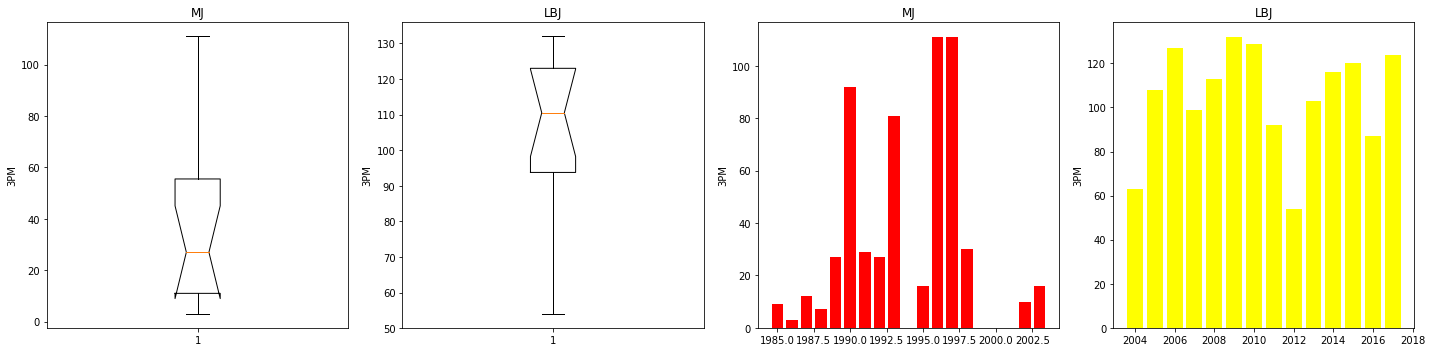

In [12]:
#MJ's 3PM
mj_3PM = mj_vs_lbj.loc['Michael Jordan*'][['Year','3P']]
mj_3PM = mj_3PM.set_index('Year')

#LBJ's 3PM

lbj_3PM = mj_vs_lbj.loc['LeBron James'][['Year','3P']]
lbj_3PM = lbj_3PM.set_index('Year')

#Plot MJ v. LBJ
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.boxplot(mj_3PM['3P'],'Black')
plt.ylabel('3PM')
plt.title('MJ')

plt.subplot(1,4,2)
plt.boxplot(lbj_3PM["3P"],'Purple')
plt.ylabel('3PM')
plt.title('LBJ')

plt.subplot(1,4,3)
plt.bar(mj_3PM.index, mj_3PM['3P'],color='Red')
plt.ylabel('3PM')
plt.title('MJ')

plt.subplot(1,4,4)
plt.bar(lbj_3PM.index, lbj_3PM['3P'],color='Yellow')
plt.ylabel('3PM')
plt.title('LBJ')


plt.tight_layout()
plt.show()



From the box and bar graphs, we can see that LBJ has made a lot more 3 pointers in his career than Michael. LBJs average is higher than MJ's when looking at the box plots. However, that doesn't necessarily mean LBJ scored more points than MJ. Let's look at overall points scored using the scatter plot method. 

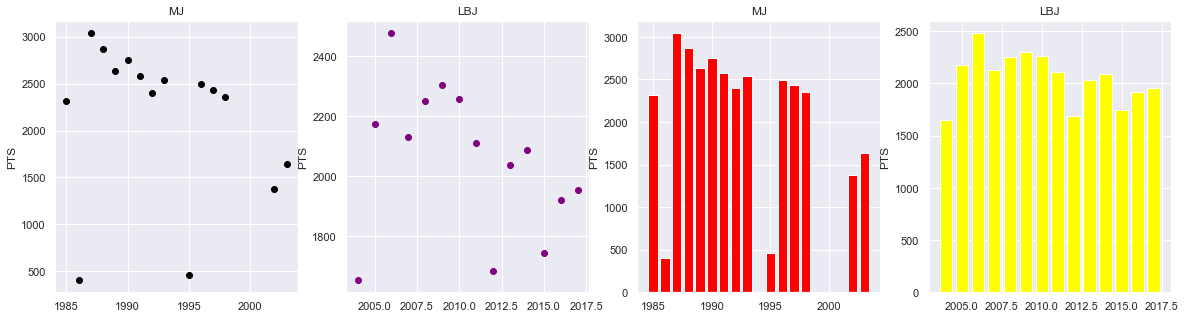

In [15]:
#MJ's 3PM
mj_PTS = mj_vs_lbj.loc['Michael Jordan*'][['Year','PTS']]
mj_PTS = mj_PTS.set_index('Year')

#LBJ's 3PM

lbj_PTS = mj_vs_lbj.loc['LeBron James'][['Year','PTS']]
lbj_PTS = lbj_PTS.set_index('Year')

#Plot MJ v. LBJ using scattor and bar plots

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.scatter(x= mj_PTS.index, y= mj_PTS['PTS'], color= 'Black')
plt.ylabel('PTS')
plt.title('MJ')

plt.subplot(1,4,2)
plt.scatter(x= lbj_PTS.index, y= lbj_PTS["PTS"], color= 'Purple')
plt.ylabel('PTS')
plt.title('LBJ')

plt.subplot(1,4,3)
plt.bar(mj_PTS.index, mj_PTS['PTS'],color='Red')
plt.ylabel('PTS')
plt.title('MJ')

plt.subplot(1,4,4)
plt.bar(lbj_PTS.index, lbj_PTS['PTS'],color='Yellow')
plt.ylabel('PTS')
plt.title('LBJ')

plt.show()

As suspected, overall, MJ has scored more points than LBJ. MJ had several years where he scored over 2500 pts, LBJ hasn't scored over 2500 pts once. Overall, you can say that LBJ may be better than MJ when looking at all stats combine. However, when looking at stats seperately, there are some categories where MJ has the upperhand and vice versa. Keep in mind that these are just the player stats which does not include championships and awards won by each player. 

*Bonus* let's see how the 3P shot correlates with PTS accummulated for each player 

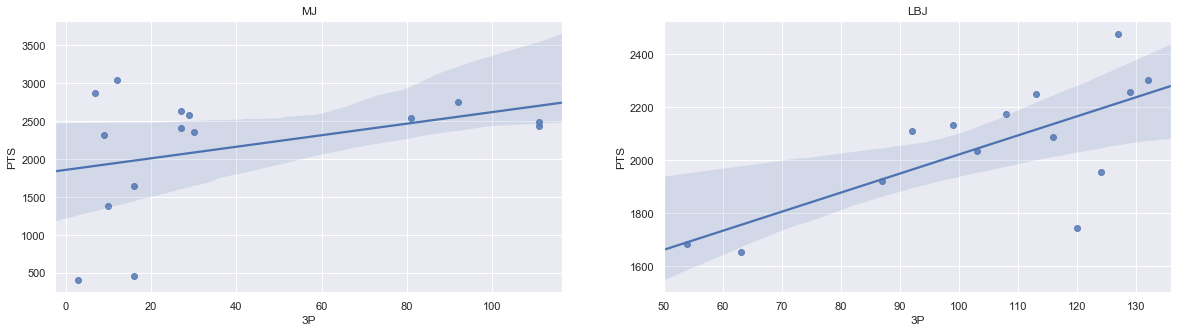

In [16]:
sns.set(color_codes=True)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.regplot(x=mj_3PM['3P'], y=mj_PTS['PTS'])
plt.ylabel('PTS')
plt.xlabel("3P")
plt.title('MJ')

plt.subplot(1,2,2)
sns.regplot(x=lbj_3PM['3P'], y=lbj_PTS['PTS'])
plt.ylabel('PTS')
plt.xlabel("3P")
plt.title('LBJ')

plt.show()

Not surprising. MJ scored a lot of points, but he did not rely on the three point shot to score. However, for LBJ, it looks like the more three pointers he made, the more points he scored overall. 